<a href="https://colab.research.google.com/github/irahanjose/Aprendizaje-de-M-quina-con-Python/blob/main/regresion_logistica_neurona_artificial_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La Neurona Artificial (y la Regresión Logística) en Keras

## 1. Configuración Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
ruta = '/gdrive/MyDrive/Colab Notebooks/01_2021-07-FundamentosDL/1.10/dataset.csv'

## 2. Lectura y visualización del set de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
np.random.seed(50)
tf.random.set_seed(25)

In [ ]:
data = pd.read_csv(ruta)

In [ ]:
data.head()

,x1,x2,y
0,1.0,7.0,1
1,4.0,0.5,0
2,6.0,3.0,1
3,1.0,4.0,0
4,3.0,4.5,1


In [ ]:
data.shape

(14, 3)

In [ ]:
X = data[['x1','x2']].to_numpy()
X.shape

(14, 2)

In [ ]:
y = data[['y']].to_numpy()
y.shape
print(y)

[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]


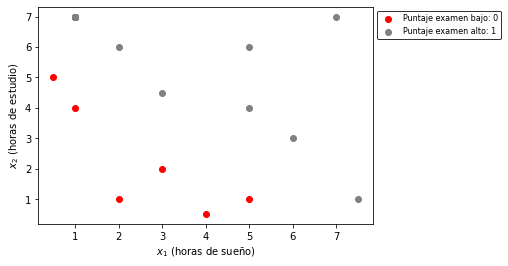

In [ ]:
idx0 = np.where(y==0) # Puntaje examen bajo
idx1 = np.where(y==1) # Puntaje examen alto

plt.scatter(X[idx0,0],X[idx0,1],color='red',label='Puntaje examen bajo: 0')
plt.scatter(X[idx1,0],X[idx1,1],color='gray',label='Puntaje examen alto: 1')
plt.xlabel('$x_1$ (horas de sueño)')
plt.ylabel('$x_2$ (horas de estudio)')
plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=8,edgecolor='black')

## 3. Crear la Neurona Artificial (modelo de Regresión Logística/Clasificación binaria) en Keras

In [ ]:
# Contenedor vacío
modelo = Sequential()

In [ ]:
# Parámetros de entrada del modelo
dim_entrada = X.shape[1]    # Cada ejemplo de entrenamiento tendrá 2 características (x1,x2)
dim_salida = 1              # El dato de salida será un escalar (probabilidad)

# Comenzar a llenar el modelo ('add')
modelo.add(Dense(dim_salida, input_dim = dim_entrada, activation='sigmoid'))
# ¡Y listo, ya tenemos la neurona!

In [ ]:
# Información del modelo: w1x1 + w2x2 + b
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## 4. Optimizador (Gradiente Descendente Estocástico) y pérdida

In [ ]:
# Optimización: se usará gradiente descendente (SGD) con lr=0.2, función de error entropía
# cruzada (binary_crossentropy), métrica para el desempeño: accuracy (precisión)

optimizador = SGD(learning_rate=0.4)
modelo.compile(loss='binary_crossentropy', optimizer=optimizador, metrics=['accuracy'])

## 5. Entrenamiento y predicción

In [ ]:
n_epochs = 100
s_minibatches = X.shape[0]  # Cada batch será del mismo tamaño del set de entrenamiento
historia = modelo.fit(X,y,epochs=n_epochs,batch_size=s_minibatches,verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 297ms/step - loss: 4.4241 - accuracy: 0.4286
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7827 - accuracy: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6484 - accuracy: 0.5714
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6321 - accuracy: 0.6429
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.5714
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.7143
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6980 - accuracy: 0.5714
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6498 - accuracy: 0.7143
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7296 - accuracy: 0.5714
Epoch 11/100
1/1 [========

### 5.1 Comportamiento del error

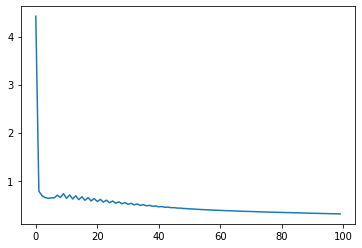

In [ ]:
plt.plot(historia.history['loss']);

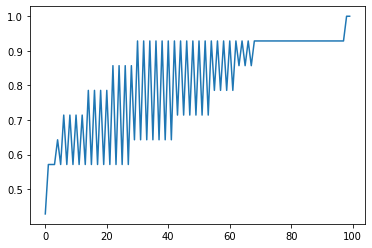

In [ ]:
plt.plot(historia.history['accuracy']);

### 5.2 Predicción

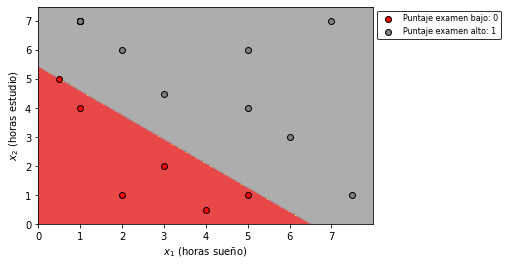

In [ ]:
def dibujar_frontera(X,Y,modelo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la grilla 
    probabilidades = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

    umbral = 0.5
    Z = np.where(probabilidades > umbral, 1, 0)
    #Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    plt.scatter(X[idx0,0],X[idx0,1],color='red', edgecolor='k', label='Puntaje examen bajo: 0')
    plt.scatter(X[idx1,0],X[idx1,1],color='gray',edgecolor='k', label='Puntaje examen alto: 1')
    plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=8,edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xlabel('$x_1$ (horas sueño)')
    plt.ylabel('$x_2$ (horas estudio)')

dibujar_frontera(X,y,modelo)